# MULTIPLE LINEAR REGRESSION MODEL FOR WEIGHT ESTIMATION FROM MEASUREMENTS OF THE FISH

#The aim of this case study is to estimate weight of the fish individuals from their measurements
#through using linear regression model.
#This study can be improved to use in fish farms. Individual fish swimming in front of the camera can
#be measured from the video image and the weight of the fish can be estimated through the linear
#regression model.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'F:\IMARTICUS\Fish_dataset.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
90,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
23,Bream,680.0,31.8,35.0,40.6,15.4686,6.1306
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515
57,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200


In [3]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


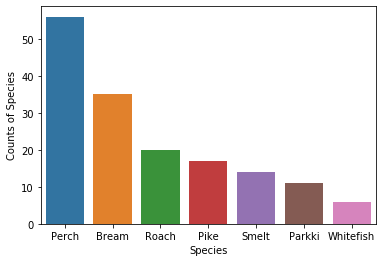

In [5]:
# 1.Plot a bar chart showing count of individual species
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

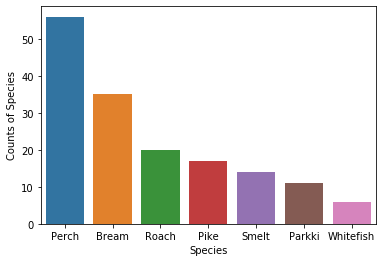

In [6]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()


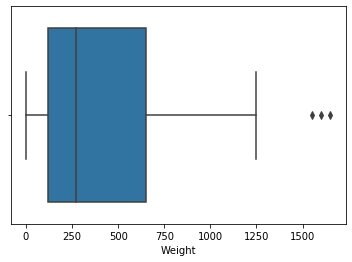

In [7]:
#identify outliers
sns.boxplot(x=df['Weight'])

In [8]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [9]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

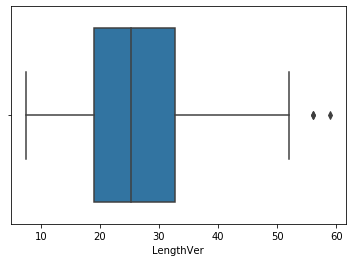

In [10]:
sns.boxplot(x=df['LengthVer'])


In [11]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers


142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

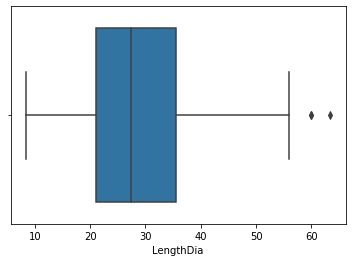

In [12]:
sns.boxplot(x=df['LengthDia'])


In [13]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers


142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

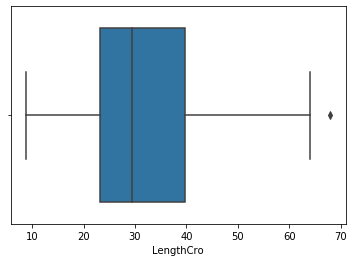

In [14]:
sns.boxplot(x=df['LengthCro'])


In [15]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers


144    68.0
Name: LengthCro, dtype: float64

In [16]:
df1 = df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


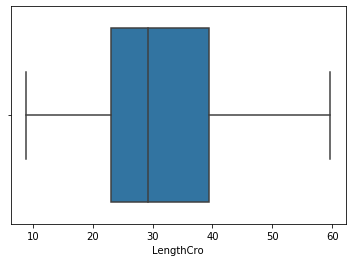

In [17]:
sns.boxplot(x=df1['LengthCro'])

In [18]:
# 3.Build a regression model and print regression equation

# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [20]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))


How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [21]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#my model's parameters:
print('Model intercept:', reg.intercept_)
print('Model coefficients:', reg.coef_)

Model intercept: -441.0088725388175
Model coefficients: [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [23]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')


y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


In [24]:
#4. what is the mean score of the model at 95% 
y_pred =reg.predict(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(cross_val_score_train)


[0.89119112 0.93859621 0.92572295 0.88550794 0.83504798]


In [26]:
cross_val_score_train.mean()


0.8952132388952407

In [27]:
#5. comapre real and predicted weights and give a conclusion ststement based on it
y_pred1= pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


In [31]:
y_test1 = pd.DataFrame(y_test)
y_test=y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [32]:
ynew= pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074


CONCLUSION STATEMENT: from the results above , one can see there is a tendency towards errorous estimations when weight is small.